In [1]:
import torch

In [2]:
import numpy as np

In [3]:
import torchvision
from torchvision.datasets import MNIST

In [4]:
dataset = MNIST(root='data/',download=True)

In [5]:
len(dataset)

60000

In [6]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [7]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x1E58B48E640>, 5)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


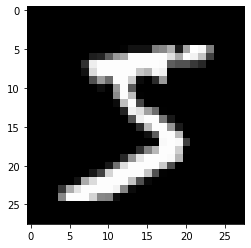

In [9]:
image , label = dataset[0]
plt.imshow(image,cmap='gray')
print('Label:',label)

Label: 3


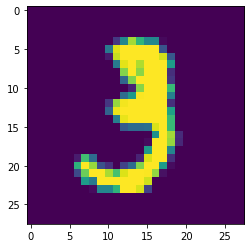

In [10]:
image , label = dataset[10]
plt.imshow(image)
print('Label:',label)

In [11]:
import torchvision.transforms as transforms

In [12]:
dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [13]:
img_tensor , label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [14]:
print(img_tensor[:,10:20,5:17])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.0039, 0.6039, 0.9922,
          0.3529, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5451, 0.9922,
          0.7451, 0.0078, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0431, 0.7451,
          0.9922, 0.2745, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1373,
          0.9451, 0.8824, 0.6275, 0.4235],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.3176, 0.9412, 0.9922, 0.9922],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.1765, 0.7294, 0.9922],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0627, 0.3647],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

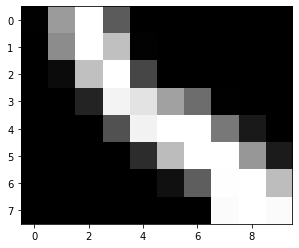

In [15]:
plt.imshow(img_tensor[0,10:18,10:20],cmap='gray')

In [16]:
import numpy as np
def split_indices(n,val_pct):
    # Determine size of validation
    n_val = int(val_pct*n)
    #create random permutation of 0 to n-1
    idxs = np.random.permutation(n)
    # pick first n_val indices for validation set
    return idxs[n_val:] , idxs[:n_val]

In [17]:
train_indices , val_indices = split_indices(len(dataset),val_pct=0.2)

In [18]:
print(len(train_indices),len(val_indices))

48000 12000


In [19]:
print('Sample validation indices :',val_indices[:20])

Sample validation indices : [21310 41055 18131 51206 36474 58021 32866 33468 57454 19969 27592 21127
 46611 23503 47999 49455 37143 15023 22654 24197]


In [20]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [21]:
batch_size = 100

# traning sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,batch_size,sampler=train_sampler)

# validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,batch_size,sampler=val_sampler)

In [22]:
import torch.nn as nn

input_size = 28*28 # each image is 28 X 28 Pixels 
num_classes = 10 # we want 10 class classifier
# Logistic regression model
model = nn.Linear(input_size,num_classes)


In [23]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0143,  0.0151,  0.0063,  ..., -0.0067,  0.0045, -0.0145],
        [-0.0259, -0.0198,  0.0146,  ...,  0.0317, -0.0116, -0.0340],
        [ 0.0245, -0.0176, -0.0299,  ..., -0.0097,  0.0234,  0.0287],
        ...,
        [-0.0272, -0.0153,  0.0241,  ..., -0.0256, -0.0258,  0.0175],
        [ 0.0090, -0.0270, -0.0248,  ...,  0.0254, -0.0249, -0.0237],
        [ 0.0250, -0.0076, -0.0181,  ..., -0.0138, -0.0282,  0.0307]],
       requires_grad=True)

In [24]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0243, -0.0244, -0.0090, -0.0279,  0.0095,  0.0170, -0.0299, -0.0269,
        -0.0115,  0.0240], requires_grad=True)

In [25]:
for images , labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([4, 3, 6, 0, 9, 6, 7, 4, 0, 4, 7, 4, 8, 6, 1, 1, 7, 8, 6, 7, 3, 9, 4, 4,
        0, 8, 3, 0, 4, 1, 1, 9, 0, 3, 6, 6, 1, 0, 7, 5, 7, 3, 7, 8, 0, 1, 6, 8,
        8, 4, 0, 7, 5, 1, 7, 5, 8, 6, 2, 5, 4, 1, 1, 6, 7, 7, 7, 0, 0, 0, 2, 9,
        3, 2, 6, 9, 7, 5, 2, 7, 7, 3, 6, 9, 9, 5, 1, 4, 6, 0, 7, 9, 4, 9, 1, 9,
        9, 7, 0, 7])
torch.Size([100, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x10)

In [26]:
class MnistModel (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [27]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0093,  0.0184,  0.0355,  ..., -0.0122,  0.0012,  0.0023],
         [-0.0161,  0.0228,  0.0110,  ...,  0.0283, -0.0304, -0.0336],
         [ 0.0135, -0.0215,  0.0010,  ...,  0.0073,  0.0125,  0.0128],
         ...,
         [ 0.0194,  0.0031, -0.0057,  ...,  0.0214,  0.0078, -0.0210],
         [ 0.0002,  0.0181,  0.0193,  ..., -0.0333, -0.0062,  0.0189],
         [-0.0284,  0.0073, -0.0287,  ...,  0.0039,  0.0056, -0.0239]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0142, -0.0216,  0.0257,  0.0150,  0.0140, -0.0165, -0.0281,  0.0025,
          0.0335, -0.0126], requires_grad=True)]

In [28]:
for images , labels in train_loader:
    outputs = model(images)
    break

print('Output.shape:',outputs.shape)
print('Sample outputs:\n',outputs[:2].data)

Output.shape: torch.Size([100, 10])
Sample outputs:
 tensor([[-0.0523,  0.1149,  0.0228, -0.1443, -0.0821, -0.3052,  0.0430,  0.0099,
          0.2067, -0.0658],
        [ 0.0672, -0.1157,  0.2573,  0.3698,  0.1234, -0.1748, -0.0514,  0.0332,
          0.0090,  0.2640]])


In [29]:
import torch.nn.functional as F

In [30]:
# apply softmax for each output row
probs = F.softmax(outputs,dim=1)

# Look at sample probability
print('Sample Probability:\n',probs[:2].data)

# add up the probabilities of an output row
print('Sum of Probability:',torch.sum(probs[0]).item())

Sample Probability:
 tensor([[0.0965, 0.1140, 0.1040, 0.0880, 0.0936, 0.0749, 0.1061, 0.1027, 0.1250,
         0.0952],
        [0.0975, 0.0812, 0.1179, 0.1320, 0.1032, 0.0766, 0.0866, 0.0943, 0.0920,
         0.1187]])
Sum of Probability: 0.9999999403953552


In [31]:
max_probs , preds = torch.max(probs,dim=1)
print(preds)
print(max_probs)

tensor([8, 3, 2, 2, 2, 0, 7, 4, 7, 6, 3, 9, 4, 2, 6, 6, 8, 4, 2, 2, 2, 3, 3, 2,
        2, 0, 6, 4, 2, 3, 9, 6, 6, 3, 6, 8, 7, 3, 8, 6, 2, 9, 2, 9, 3, 8, 9, 7,
        3, 4, 2, 9, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 8, 9, 3, 9, 2, 2, 7, 3, 9, 2,
        2, 0, 9, 6, 2, 3, 3, 2, 8, 8, 6, 2, 3, 8, 8, 2, 3, 2, 2, 3, 8, 8, 6, 3,
        8, 2, 2, 2])
tensor([0.1250, 0.1320, 0.1327, 0.1632, 0.1344, 0.1276, 0.1139, 0.1122, 0.1277,
        0.1194, 0.1285, 0.1242, 0.1270, 0.1388, 0.1279, 0.1339, 0.1322, 0.1182,
        0.1130, 0.1263, 0.1459, 0.1312, 0.1306, 0.1336, 0.1249, 0.1133, 0.1250,
        0.1230, 0.1314, 0.1398, 0.1250, 0.1318, 0.1210, 0.1317, 0.1201, 0.1346,
        0.1314, 0.1285, 0.1400, 0.1169, 0.1596, 0.1092, 0.1231, 0.1229, 0.1444,
        0.1355, 0.1142, 0.1161, 0.1248, 0.1306, 0.1314, 0.1181, 0.1345, 0.1473,
        0.1300, 0.1592, 0.1606, 0.1549, 0.1231, 0.1398, 0.1375, 0.1188, 0.1224,
        0.1214, 0.1196, 0.1364, 0.1631, 0.1299, 0.1196, 0.1343, 0.1151, 0.1388,
        0.1447, 0.1

In [32]:
labels

tensor([2, 9, 3, 2, 9, 6, 1, 6, 1, 1, 9, 1, 6, 6, 1, 4, 2, 2, 1, 8, 2, 7, 5, 4,
        1, 7, 3, 1, 5, 9, 1, 2, 5, 8, 1, 2, 8, 4, 8, 3, 4, 2, 7, 1, 8, 6, 1, 5,
        8, 5, 4, 4, 2, 5, 7, 8, 5, 7, 8, 5, 9, 2, 4, 5, 5, 7, 0, 9, 1, 7, 1, 9,
        9, 3, 1, 6, 8, 5, 8, 9, 6, 2, 3, 5, 3, 6, 2, 6, 4, 6, 0, 9, 4, 9, 2, 8,
        6, 8, 7, 9])

In [33]:
def accuracy(l1,l2):
    return torch.sum(l1==l2).item()/len(l1)

In [34]:
labels == preds

tensor([False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False])

In [35]:
torch.sum(labels==preds).item()/len(labels)

0.05

In [36]:
accuracy(labels,preds)

0.05

In [37]:
x = 0.000001
y = 0.9999
import math
-math.log(x)
-math.log(y)

0.00010000500033334732

In [38]:
loss_fn = F.cross_entropy

In [39]:
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.3534, grad_fn=<NllLossBackward>)


In [40]:
# optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [41]:
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):
    # Calcilate loss
    preds = model(xb)
    loss = loss_func(preds,yb)
    
    if opt is not None:
        # compute Gradients
        loss.backward()
        # update parameters
        opt.step()
        # reset grdients
        opt.zero_grad()
        
    metric_result = None
    if metric is not None:
        # compute metric
        metric_result = metric(preds,yb)
        
        
    return loss.item(),len(xb),metric_result

In [42]:
def evaluate (model,loss_fn,valid_dl,metric=None):
    with torch.no_grad():
        # pass each batch through the model
        results = [loss_batch(model,loss_fn,xb,yb,metric=metric)
                  for xb,yb in valid_dl]
        # separate losses , counts and metrics
        losses , nums , metrics = zip(*results)
        # total size of the dataset
        total = np.sum(nums)
        # average loss accross batches
        avg_loss = np.sum(np.multiply(losses,nums))/total
        avg_metric = None
        if metric is not None:
            # average of metric accross batches
            avg_metric = np.sum(np.multiply(metrics,nums))/total
        
        return avg_loss,total,avg_metric

In [43]:
def accuracy(outputs,labels):
    _, preds = torch.max(outputs,dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [44]:
val_loss , total , val_acc = evaluate(model,loss_fn,val_loader,metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss,val_acc))

Loss: 2.3466, Accuracy: 0.0831


In [45]:
def fit(epochs,model,loss_fn,opt,train_dl,valid_dl,metric=None):
    for epoch in range(epochs):
        # Traning Model
        for xb, yb in train_dl:
            loss,_,_ = loss_batch(model,loss_fn,xb,yb,opt)
        
        # Evaluation
        result = evaluate(model,loss_fn,valid_dl,metric)
        val_loss , total, val_metric = result
        
        # printing progress
        if metric is None:
            print('Epoch [{}/{}] , Loss: {:.4f}'.format(epoch+1,epochs,val_loss))
        else:
            print('Epoch [{}/{}] , Loss: {:.4f}, {}: {:.4f}'.format(epoch+1,epochs,val_loss,metric.__name__,val_metric))

In [46]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [47]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1/5] , Loss: 1.8738, accuracy: 0.6489
Epoch [2/5] , Loss: 1.5770, accuracy: 0.7469
Epoch [3/5] , Loss: 1.3678, accuracy: 0.7772
Epoch [4/5] , Loss: 1.2168, accuracy: 0.7952
Epoch [5/5] , Loss: 1.1045, accuracy: 0.8067


In [48]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1/5] , Loss: 1.0184, accuracy: 0.8163
Epoch [2/5] , Loss: 0.9505, accuracy: 0.8230
Epoch [3/5] , Loss: 0.8955, accuracy: 0.8285
Epoch [4/5] , Loss: 0.8502, accuracy: 0.8331
Epoch [5/5] , Loss: 0.8121, accuracy: 0.8373


In [49]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1/5] , Loss: 0.7796, accuracy: 0.8413
Epoch [2/5] , Loss: 0.7515, accuracy: 0.8444
Epoch [3/5] , Loss: 0.7269, accuracy: 0.8470
Epoch [4/5] , Loss: 0.7053, accuracy: 0.8497
Epoch [5/5] , Loss: 0.6861, accuracy: 0.8519


In [50]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1/5] , Loss: 0.6688, accuracy: 0.8540
Epoch [2/5] , Loss: 0.6533, accuracy: 0.8562
Epoch [3/5] , Loss: 0.6392, accuracy: 0.8582
Epoch [4/5] , Loss: 0.6263, accuracy: 0.8597
Epoch [5/5] , Loss: 0.6145, accuracy: 0.8615


In [53]:
# at max this model can not go above 90 %  accuracy

Text(0.5, 1.0, 'Accuracy Vs. No of Epochs')

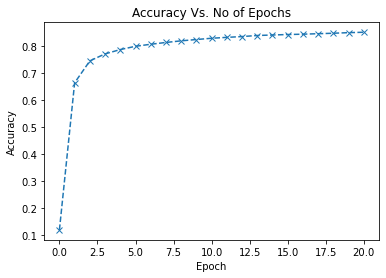

In [54]:
# On Old OUTPUTS
accuracies = [0.1188,
             0.6647,0.7460,0.7720,0.7880,0.8002,
             0.8077,0.8144,0.8204,0.8253,0.8300,
             0.8333,0.8363,0.8402,0.8421,0.8438,
             0.8451,0.8469,0.8486,0.8508,0.8523]
plt.plot(accuracies , '--x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs. No of Epochs')

In [55]:
# define test  dataset 
test_dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 5


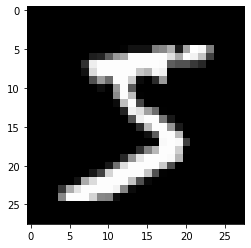

In [56]:
img, label = test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Shape:',img.shape)
print('Label:',label)

In [58]:
# addes ANother Dimension
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [59]:
def predict_image(img,model):
    xb= img.unsqueeze(0)
    yb= model(xb)
    _,preds = torch.max(yb,dim=1)
    return preds[0].item()

Label: 5 Predicted: 5


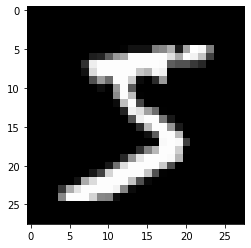

In [61]:
img,label =test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Label:',label,'Predicted:',predict_image(img,model))

Label: 7 Predicted: 7


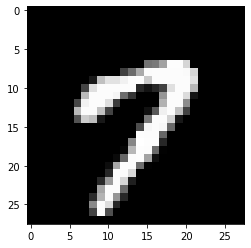

In [64]:
img,label =test_dataset[15]
plt.imshow(img[0],cmap='gray')
print('Label:',label,'Predicted:',predict_image(img,model))

Label: 1 Predicted: 1


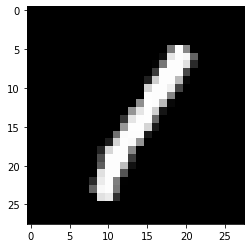

In [65]:
img,label =test_dataset[23]
plt.imshow(img[0],cmap='gray')
print('Label:',label,'Predicted:',predict_image(img,model))

Label: 3 Predicted: 3


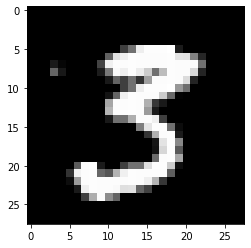

In [66]:
img,label =test_dataset[49]
plt.imshow(img[0],cmap='gray')
print('Label:',label,'Predicted:',predict_image(img,model))

Label: 4 Predicted: 1


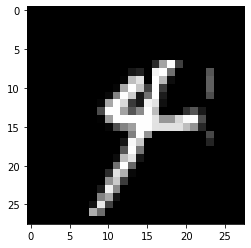

In [71]:
img,label =test_dataset[53]
plt.imshow(img[0],cmap='gray')
print('Label:',label,'Predicted:',predict_image(img,model))

In [72]:
test_loader = DataLoader(test_dataset,batch_size=200)

test_loss, total , test_acc = evaluate(model,loss_fn,test_loader,metric=accuracy)
print('Loss :{:.4f} Accuracy: {:.4f}'.format(test_loss,test_acc))

Loss :0.6220 Accuracy: 0.8581


In [73]:
## Loss : 0.6220 and Accuracy : 0.8581

# Saving and Loading the model

In [74]:
torch.save(model.state_dict(),'mnist-logistic.pth')

In [76]:
model.state_dict()
# this contains weights and bais 

OrderedDict([('linear.weight',
              tensor([[ 0.0160,  0.0228,  0.0040,  ...,  0.0302, -0.0286,  0.0002],
                      [ 0.0271,  0.0153,  0.0347,  ...,  0.0096, -0.0208, -0.0263],
                      [ 0.0140,  0.0355,  0.0246,  ...,  0.0124, -0.0100, -0.0305],
                      ...,
                      [ 0.0135,  0.0092, -0.0316,  ...,  0.0323, -0.0183, -0.0198],
                      [ 0.0258, -0.0282, -0.0113,  ...,  0.0180, -0.0152, -0.0107],
                      [ 0.0193, -0.0313, -0.0185,  ..., -0.0050,  0.0333,  0.0248]])),
             ('linear.bias',
              tensor([-0.0685,  0.1298, -0.0112, -0.0469,  0.0144,  0.0415, -0.0061,  0.0403,
                      -0.1152, -0.0264]))])

In [77]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0160,  0.0228,  0.0040,  ...,  0.0302, -0.0286,  0.0002],
                      [ 0.0271,  0.0153,  0.0347,  ...,  0.0096, -0.0208, -0.0263],
                      [ 0.0140,  0.0355,  0.0246,  ...,  0.0124, -0.0100, -0.0305],
                      ...,
                      [ 0.0135,  0.0092, -0.0316,  ...,  0.0323, -0.0183, -0.0198],
                      [ 0.0258, -0.0282, -0.0113,  ...,  0.0180, -0.0152, -0.0107],
                      [ 0.0193, -0.0313, -0.0185,  ..., -0.0050,  0.0333,  0.0248]])),
             ('linear.bias',
              tensor([-0.0685,  0.1298, -0.0112, -0.0469,  0.0144,  0.0415, -0.0061,  0.0403,
                      -0.1152, -0.0264]))])

In [78]:
test_loss , total , test_acc = evaluate(model2,loss_fn,test_loader,metric=accuracy)
print('Loss : {:.4f} Accuracy : {:.4f}'.format(test_loss,test_acc))

Loss : 0.6220 Accuracy : 0.8581
